In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

original_path = os.getcwd()

## Checking dataset
[***Source: Standford Dogs dataset***](http://vision.stanford.edu/aditya86/ImageNetDogs/)

In [2]:
os.chdir('data')
print('number of breeds: {}'.format(len(os.listdir())))
total_num = 0
for breed in os.listdir():
    os.chdir(breed)
    total_num += len(os.listdir())
    os.chdir('..')
print('total number of img: {}'.format(total_num))
os.chdir(original_path)

number of breeds: 120
total number of img: 20580


## Folder/file name cleaning

In [3]:
def name_cleaning(flag=False):
    if flag:
        os.chdir('data') # root data folder
        for breed in os.listdir():
            if os.path.isdir(breed):
                os.rename(breed,breed.split('-')[1]) ## cleaning up folder names
        for breed in os.listdir(): 
            os.chdir(breed)
            current_list = os.listdir(os.getcwd())
            for i in range(len(os.listdir())):
                original_name = current_list[i]
                new_name = breed + '_{:04d}'.format(i+1) + os.path.splitext(original_name)[-1] ## cleaning up file names
                if not os.path.exists(new_name):
                    os.rename(original_name,new_name)
            os.chdir('..')
        os.chdir(original_path)
    else:
        print('Folder and file names are already processed')

In [4]:
name_cleaning()

Folder and file names are already processed


## Display sample images

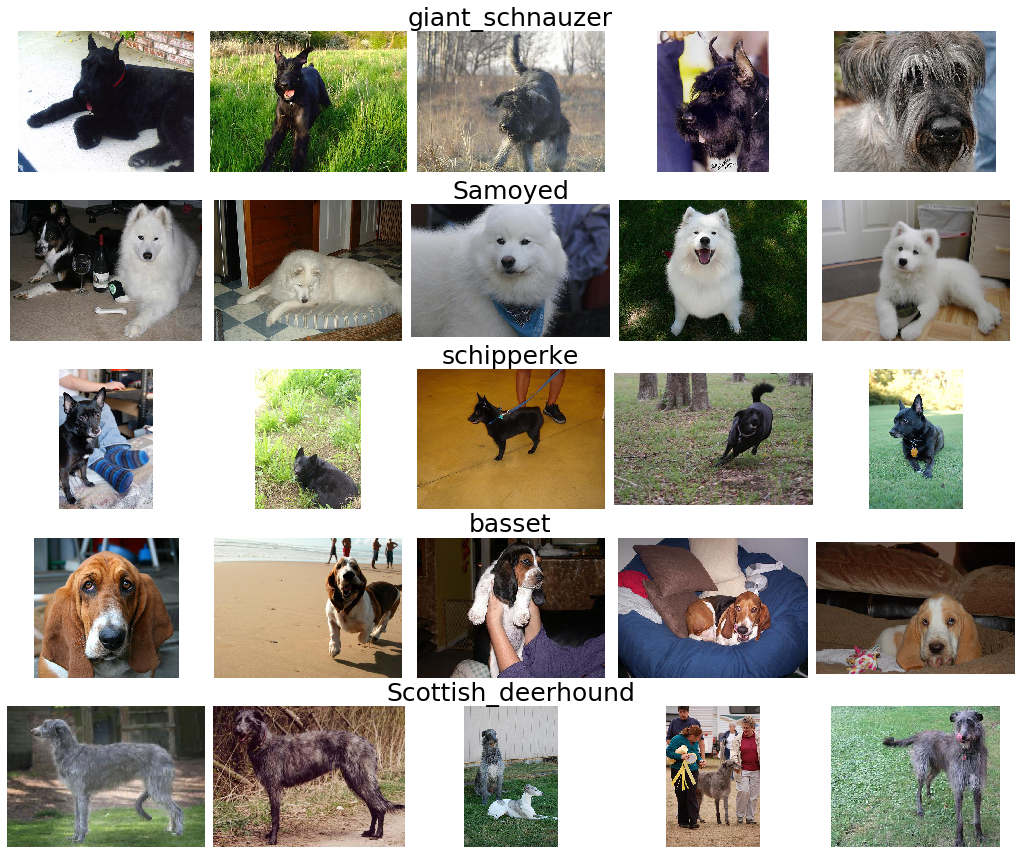

In [5]:
np.random.seed(seed=0)
n_samples = 5
n_breed = 5
fig, rows = plt.subplots(n_breed, n_samples, figsize = (4*n_samples, 3*n_breed))

os.chdir('data')
for row,breed in zip(rows,np.random.choice(os.listdir(),n_breed,replace=False)):
    row[int(np.floor(n_samples/2))].set_title(breed,fontsize=25)
    os.chdir(breed)
    for col_ax,img in zip(row,np.random.choice(os.listdir(),n_samples,replace=False)):
        rand_img = cv2.imread(img)
        rand_img = cv2.cvtColor(rand_img,cv2.COLOR_BGR2RGB)
        col_ax.imshow(rand_img)
        col_ax.axis('off')
    os.chdir('..')
plt.subplots_adjust(left=0.2, wspace=0.02)
os.chdir(original_path)

## Load/pre-processing images

In [ ]:
os.chdir('data')
breed_list = os.listdir()
idx_list = list(range(len(os.listdir())))
label_dict = {k: v for k, v in zip(breed_list,idx_list)} 
os.chdir(original_path)

In [ ]:
img_rows = 224
img_cols = 224
img_list = []
label_list = []
os.chdir('data')
for breed in os.listdir():
    os.chdir(breed)
    current_list = os.listdir()
    for img in current_list:
        img_in = cv2.imread(img)    
        img_in = cv2.cvtColor(img_in,cv2.COLOR_BGR2RGB)    
        img_in = cv2.resize(img_in,(img_rows,img_cols),cv2.INTER_AREA)
        img_list.append(img_in)
        label_list.append(label_dict[breed])
    os.chdir('..')
os.chdir(original_path)

img_data = np.array(img_list).astype(np.float32)
img_label = np.array(label_list)
img_data /= 255.

In [ ]:
print('training data shape: {}'.format(img_data.shape))
print('label shape: {}'.format(img_label.shape))

In [ ]:
datagen = ImageDataGenerator()